In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dtypes_dict = {'created':'str',  'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_language': 'category'}

installs = pd.read_csv('data/train_installs.csv.gzip', dtype=dtypes_dict, parse_dates=['created'])
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
#installs.drop('trans_id', axis=1, inplace=True) #solo 6 columnas con datos y no son revelantes
installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [216]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [106]:
installs['device_countrycode'].value_counts()

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

In [226]:
installs['ref_hash'].value_counts() # en events

5208834946313176321    4
3272750442824629569    4
1999001885916451618    3
2457547163021424058    3
2515049144505739996    3
5376622639905210608    3
470581161921490835     3
2807966731127456435    3
394181128078904930     3
1332624341050561368    3
8209340170282049305    3
1826618012885478111    3
6207088909238189318    3
4603142710878547974    3
4587898421740190562    3
3429460795301152906    3
1838099903940931904    3
808602801225309575     3
2756309363004630634    3
5716316704073038128    3
1951826604052927528    3
5707101515634134793    3
3293250764324184935    3
6697381140026413622    2
1051816244049516468    2
2429923283539157643    2
8378288095655268347    2
4049391409413329307    2
1162390149017457197    2
8956666120381022264    2
                      ..
432026705480919604     1
868940215859934734     1
4424921869962083331    1
667593224187123722     1
826262859425189535     1
3807326297196549242    1
453115979634562298     1
2987878111541902309    1
3081130218041894318    1


In [227]:
installs['ip_address'].value_counts()

1992632945768888579    33
2403839579048525602    26
2394721645995561079    17
589886713227299026     16
8262991154202232888    14
8010533080341024188    13
8531002764348621869    12
7726314782926052608    12
7481987231813232849    11
2441645233986204328    11
2706357072127963511     9
3162368506662488065     9
6586849487961128061     7
7052859104363282878     7
9040150555093642379     7
627974920620404284      7
4895833194809562361     7
4371364616797404439     6
3222899837426106171     5
1037699812701179191     5
5437394128393850342     5
739514463662096135      5
6324037615828123965     5
8235954648733428120     5
7950883564880561905     5
3927367081536317814     5
7174799503430545910     4
2988221197536288219     4
6452955265823183819     4
1933486918445844180     4
                       ..
1488715796382824376     1
8582476476054892626     1
7766233397987027039     1
2978724023808640249     1
7488499899710199132     1
1515684618293858224     1
8370884033418651464     1
708253280447

In [221]:
installs['ref_type'].value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [223]:
installs['implicit'].value_counts()

False    2547
True      865
Name: implicit, dtype: int64

In [212]:
installs['trans_id'].value_counts()

{hash}                                  3
22380348598                             1
44aeb6df-8db4-4b3f-ac67-0a802d479c86    1
89bda305-bff1-4c22-ae23-1a237eac0002    1
Name: trans_id, dtype: int64

In [213]:
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [214]:
installs.head().T

,0,1,2,3,4
created,2019-03-13 01:43:33.445000,2019-03-13 04:58:35.078000,2019-03-13 04:20:57.666000,2019-03-13 04:20:57.698000,2019-03-10 22:24:56.684000
application_id,0,0,0,0,0
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,8464844987297247076,3250564871270161533,7953318831018100268,7953318831018100268,8355110941557237501
attributed,False,False,False,False,False
implicit,False,False,True,False,True
device_countrycode,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
device_brand,3.08306e+17,3.08306e+17,5.13799e+17,5.13799e+17,1.08337e+18
device_model,4.44525e+18,4.44525e+18,6.02654e+18,6.02654e+18,7.87661e+18
session_user_agent,NaN,NaN,HasOffers Mobile AppTracking v1.0,NaN,HasOffers Mobile AppTracking v1.0


In [343]:
installs.loc[installs['kind'] == 'Open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'app_open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'EVENT_Homepage', 'kind'] = 'EVENT_HOMEPAGE'
installs['kind'] = installs['kind'].astype('category')
installs['kind'].value_counts()

af_app_opened                 428
EVENT_OPEN_APP                303
EVENT_HOMEPAGE                 76
login_success                  17
account_summary_first_step     13
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
journey reserved                1
journey drop off                1
install                         1
af_list_view                    1
EVENT_PROMO                     1
Name: kind, dtype: int64

In [3]:
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [12]:
installs['ref_type'].value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [37]:
installs.loc[installs['device_model'].isnull()]

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
2157,2019-03-09 16:08:19.919,30,1494519392962156891,4364935818432173881,False,True,6333597102633388268,NaN,NaN,HasOffers Mobile AppTracking v1.0,NaN,78082c4c-0fe1-4fc7-a718-4eba1d943b9c,Open,NaN,NaN,2208800741316080623,NaN


Text(0, 0.5, 'Cantidad de instalaciones')

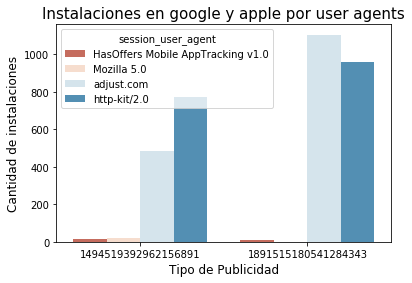

In [433]:
# g5 = sns.countplot(x='ref_type', data=installs, palette='RdBu', hue='session_user_agent')
# g5.set_title("Instalaciones en google y apple por user agents", fontsize =15)
# g5.set_xlabel("Tipo de Publicidad", fontsize = 12)
# g5.set_ylabel("Cantidad de instalaciones", fontsize = 12)
# NO SIRVE

In [80]:
#auctions.loc[auctions['application_id'] == 28].T #"Dalvik", tambien 2, 4, 10,14,16,28
#installs.loc[installs['application_id'] == '15'] # nextgen
#auctions.loc[auctions['application_id'] ==9] #mercadopago
#installs.loc[installs['application_id'] == '21'] #peixelUrbano
#installs.loc[installs['application_id'] ==  '23'] #takealot
#installs.loc[installs['application_id'] == '24'] #hotelurbano

### **1) Instalaciones por pais y sistema operativo usado**

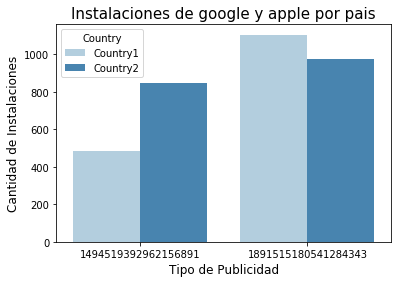

In [304]:
country_device = sns.countplot(x='ref_type', data=installs, palette='Blues', hue='device_countrycode')

country_device.set_title("Instalaciones de google y apple por pais", fontsize =15)
country_device.set_xlabel("Tipo de Publicidad", fontsize = 12)
country_device.set_ylabel("Cantidad de Instalaciones", fontsize = 12)
plt.legend(title='Country', loc='upper left', labels=['Country1', 'Country2'])

### **2) Cantidad de instalaciones por hora y día**

In [4]:
installs['day'] = pd.DatetimeIndex(installs['created']).day;
installs['hour'] = pd.DatetimeIndex(installs['created']).hour;

Text(51.0, 0.5, 'Hora')

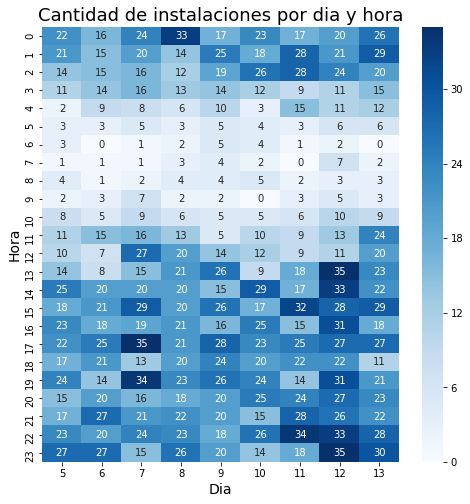

In [6]:
day_hours = installs.groupby(['hour', 'day'])['day'].count().unstack()
day_hours = day_hours.fillna(0)
plt.figure(figsize=(8, 8))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("Cantidad de instalaciones por dia y hora", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Hora", fontsize=14)

### **3) Tipo de celular al que mas instalaciones se le atribuyen**

[Text(0, 0, '2.33194661091417e+18'),
 Text(0, 0, '6.88241452041436e+18'),
 Text(0, 0, '2.616228068988996e+18'),
 Text(0, 0, '7.787530752469096e+18'),
 Text(0, 0, '2.9282623200704937e+18'),
 Text(0, 0, '9.14903648623246e+18'),
 Text(0, 0, '1.1876609915140178e+17'),
 Text(0, 0, '1.26767685640937e+18'),
 Text(0, 0, '5.990116681709081e+18'),
 Text(0, 0, '2.1369349693676012e+18')]

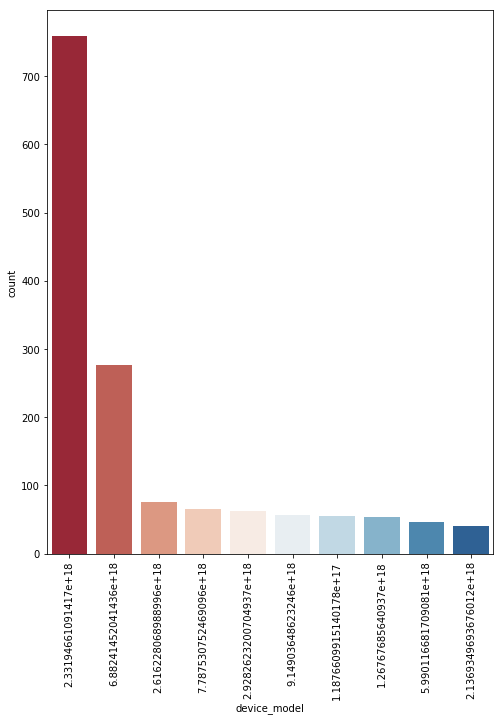

In [7]:
plt.figure(figsize=(8, 10))
device_installs = sns.countplot(x='device_model', data=installs, palette='RdBu',\
                      order=installs['device_model'].value_counts().iloc[:10].index)
device_installs.set_xticklabels(device_installs.get_xticklabels(), rotation=90)

### **4) Intalaciones por pais comparadas con el uso de wifi**

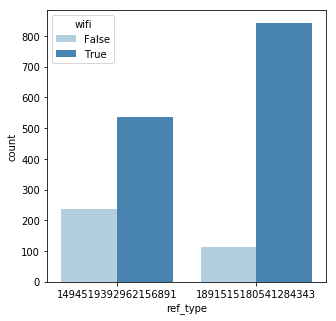

In [8]:
plt.figure(figsize=(5, 5))
wifi_type = sns.countplot(x='ref_type', data=installs, palette='Blues', hue='wifi') 

### **5) Diferencia de cantidad de instalaciones con o sin wifi**

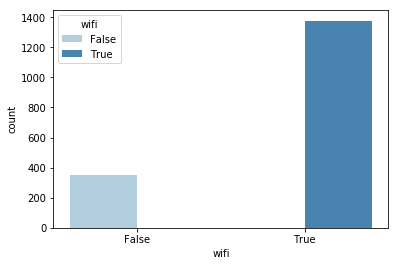

In [270]:
sns.countplot(x='wifi', data=installs, palette='Blues', hue='wifi') 
# wifi_group = installs['wifi'].value_counts().to_frame()
#wifi_group.plot.pie(y='wifi',figsize=(5, 5), colormap='winter')

### **6) Los 5 eventos más realizados luego de instalar la aplicación**

[Text(0, 0, 'af_app_opened'),
 Text(0, 0, 'EVENT_OPEN_APP'),
 Text(0, 0, 'EVENT_HOMEPAGE'),
 Text(0, 0, 'login_success'),
 Text(0, 0, 'account_summary_first_step')]

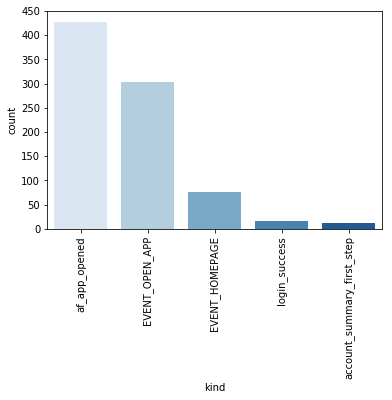

In [346]:
group = sns.countplot(x='kind', data=installs, palette='Blues', order=installs['kind'].value_counts().iloc[:5].index)
group.set_xticklabels(group.get_xticklabels(), rotation=90)

### **7) Las 10 Aplicaciones con mas instalaciones**

[Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '16'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '29'),
 Text(0, 0, '20'),
 Text(0, 0, '6'),
 Text(0, 0, '1')]

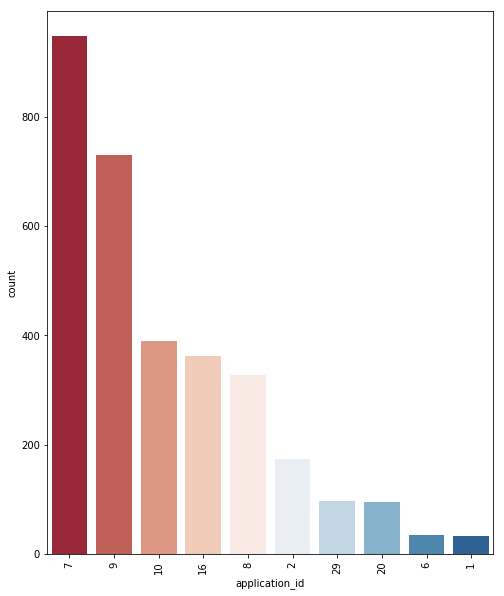

In [242]:
plt.figure(figsize=(8, 10))
group = sns.countplot(x='application_id', data=installs, palette='RdBu', order=installs['application_id'].value_counts().iloc[:10].index)
group.set_xticklabels(group.get_xticklabels(), rotation=90)

## **8) Cantidad de Instalaciones de las aplicaciones más populares por día**

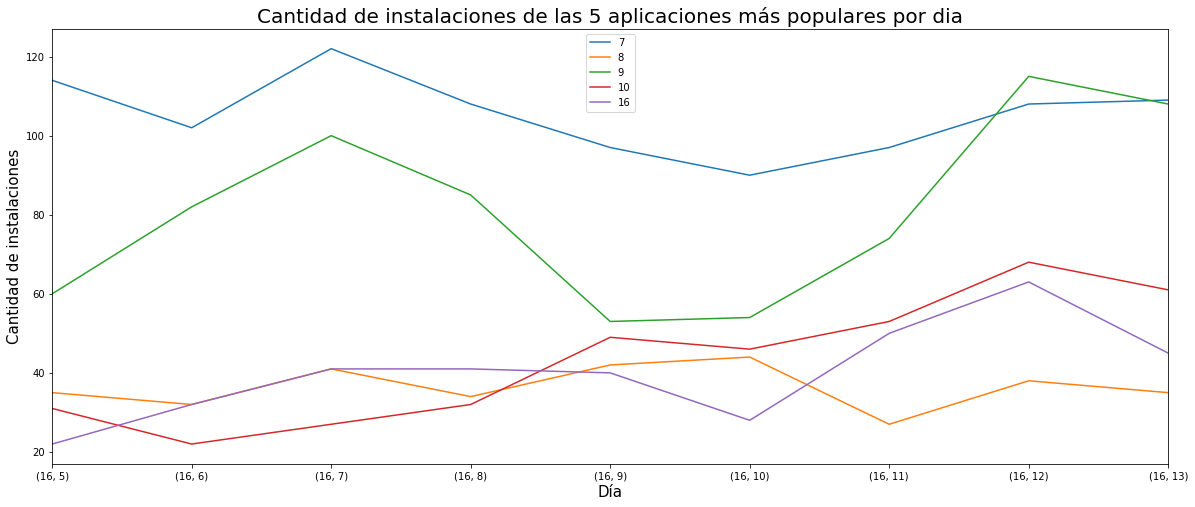

In [20]:
top5 = [x for x in installs['application_id'].value_counts().head(5).keys()]
top5_group = installs.loc[installs['application_id'].isin(top5)]
top_instalation = top5_group.groupby(['application_id', 'day']).size()

fig, ax = plt.subplots()
for key, grp in top_instalation.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,8))
plt.title("Cantidad de instalaciones de las 5 aplicaciones más populares por dia",size=20)
ax.set_ylabel('Cantidad de instalaciones',size=15);
ax.set_xlabel('Día',size=15);
plt.legend()
plt.show()

## **9) Cantidad de Instalaciones de la aplicacion más popular por hora**

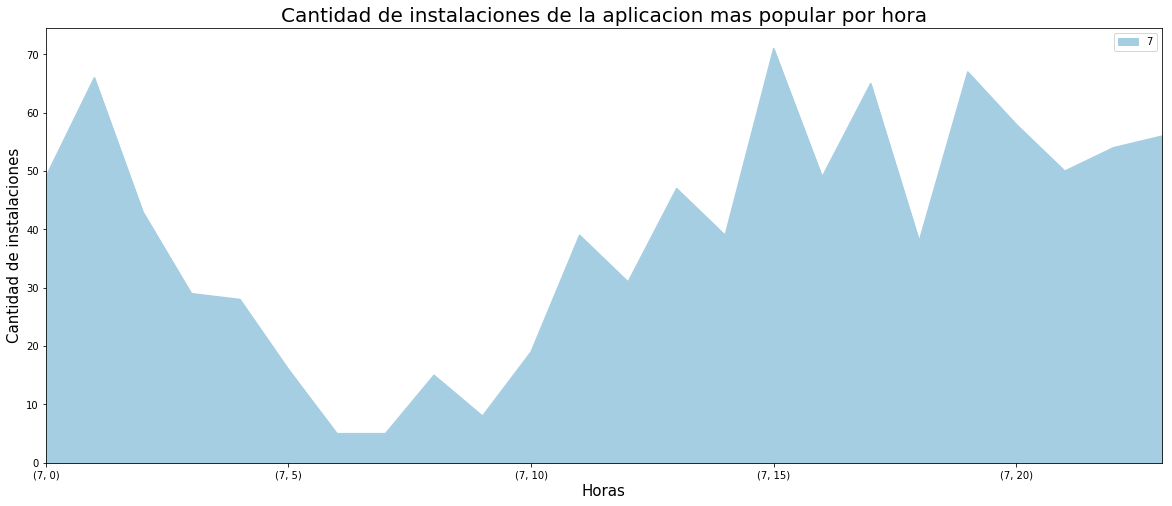

In [13]:
top = installs['application_id'].value_counts().head(1).keys()
top_group = installs.loc[installs['application_id'].isin(top)]
top_install = top_group.groupby(['application_id', 'hour']).size()

fig, ax = plt.subplots()
for key, grp in top_install.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='area', x='hour', y='count', label=key, figsize=(20,8), colormap='Paired')
plt.title("Cantidad de instalaciones de la aplicacion mas popular por hora",size=20)
ax.set_ylabel('Cantidad de instalaciones',size=15);
ax.set_xlabel('Horas',size=15);
plt.legend()
plt.show()

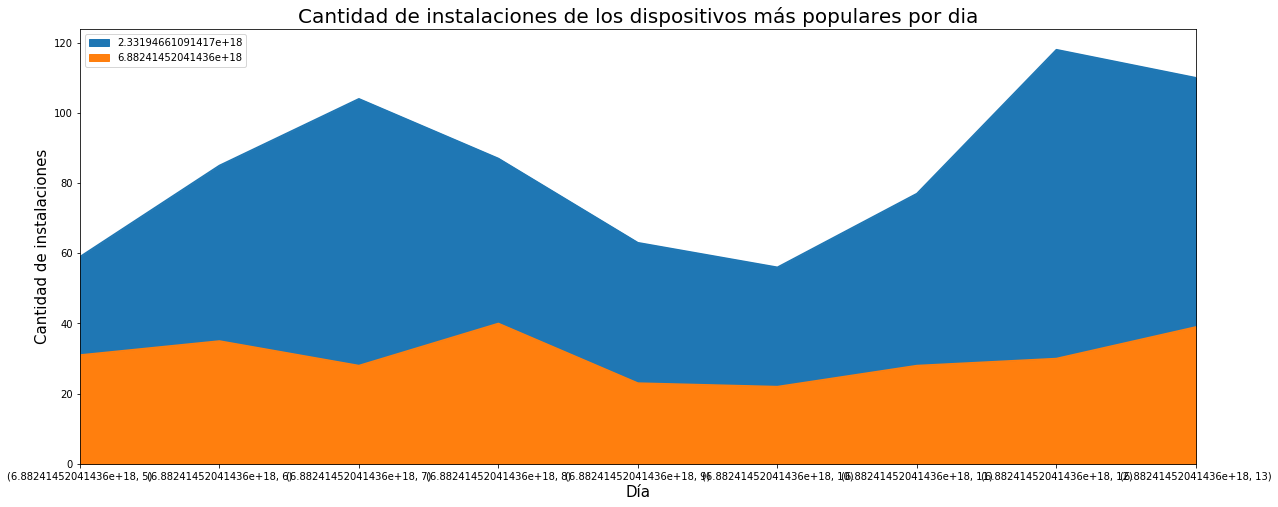

In [20]:
top_device = [x for x in installs['device_model'].value_counts().head(2).keys()]
top_group = installs.loc[installs['device_model'].isin(top_device)]
top_device_install = top_group.groupby(['device_model', 'day']).size() #.to_frame().reset_index()

# top_instalation.columns = ['device_model', 'day', 'count']
# top5_apps = pd.pivot_table(top_instalation, values='count', columns='device_model', \
#                     index='day',aggfunc=np.sum).unstack()

fig, ax = plt.subplots()
for key, grp in top_device_install.groupby(['device_model']):
    ax = grp.plot(ax=ax, kind='area', x='day', y='count', label=key, figsize=(20,8))
plt.title("Cantidad de instalaciones de los dispositivos más populares por dia",size=20)
ax.set_ylabel('Cantidad de instalaciones',size=15);
ax.set_xlabel('Día',size=15);
plt.legend()
plt.show()